In [1]:
from pathlib import Path

import pandas as pd
import seaborn as sns


# File contants

Download the data from the google drive ([link](https://drive.google.com/drive/folders/1TXDE63P9ibzGo0jTTYm-iJ_4uInlXeGD?usp=drive_link)) and place them in a directory `raw_data`.

In [2]:
DATA_DIR = Path("raw_data")
# Each year of consists of 4 CSV files
characteristics_file= "caracteristiques_{year}.csv"
locations_file="lieux_{year}.csv"
vehicles_file="vehicules_{year}.csv"
users_file="usagers_{year}.csv"

# Dataframe loading functions

In [3]:
def load_df(p: Path, sep: str =",") -> pd.DataFrame:
    encodings = [ "ISO-8859-1", "utf-8", "cp1252"]
    for encoding in encodings:
        try:
            return pd.read_csv(p, encoding = encoding ,sep=sep)
        except UnicodeDecodeError as e:
            print(f"Unable to load file:'{p} using encoding: '{encoding}''")
            print(e)
    raise RuntimeError(f"Failed to load file:'{p}'. None of the following encodings worked: {encodings}")

def load_and_merge_data_for(root_data_dir: Path, year: int) -> pd.DataFrame:
    characteristics_df = load_df(root_data_dir / characteristics_file.format(year=year))
    locations_df = load_df(root_data_dir / locations_file.format(year=year))
    vehicles_df= load_df(root_data_dir / vehicles_file.format(year=year))
    users_df=load_df(root_data_dir / users_file.format(year=year))

    return characteristics_df.merge(locations_df, on="Num_Acc").merge(vehicles_df, on="Num_Acc").merge(users_df, on="Num_Acc")

## Column name to labels

Provide the categorical labels for each column. Used for plotting.

In [4]:
col2labels_map ={
    "grav" : ["unharmed", "killed", "injured hospitalized", "lightly injured"],
    "lum" :["Full daylight", "Dusk or dawn", "Night w/o lights", "Night w lights not on", "Night with lights"],
    "agg" : ["Outside urban areas", "In Urban areas"],
    "atm": ["Not specified", "Normal", "Light rain","Heavy rain","Snow","hail","Fog","smoke","Strong wind","Storm","Dazzling weather","Overcast weather","Other"],
    "col": ["Not specified","Two vehicles - frontal","Two vehicles – from the rear","Two vehicles – from the side","Three vehicles and more – in chain","Three or more vehicles - multiple collisions","Other collision", "Without collision"],
    "int": ["Outside intersection", "X intersection","T-intersection","Y intersection","Intersection with more than 4 branches","Roundabout","Square","Level crossing","Other intersection"]
}

def plot_hist(df, col, title, ax, rot=45):
    labels = col2labels_map.get(col)
    ax = sns.histplot(df, x=col, ax=ax)
    if labels:
        ax.set_xticks(range(1, len(labels)+1), labels, rotation=rot)
    ax.set_title(title) 
    return ax


# Load individual Dataframes for a single year

In [75]:
YEAR = 2013
characteristics_df = load_df(DATA_DIR / characteristics_file.format(year=YEAR))
locations_df = load_df(DATA_DIR / locations_file.format(year=YEAR))
vehicles_df= load_df(DATA_DIR / vehicles_file.format(year=YEAR))
users_df=load_df(DATA_DIR / users_file.format(year=YEAR))

# Investigate dataframes

## The `characteristics` Dataframe

In [25]:
characteristics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58397 entries, 0 to 58396
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Num_Acc  58397 non-null  int64  
 1   an       58397 non-null  int64  
 2   mois     58397 non-null  int64  
 3   jour     58397 non-null  int64  
 4   hrmn     58397 non-null  int64  
 5   lum      58397 non-null  int64  
 6   agg      58397 non-null  int64  
 7   int      58397 non-null  int64  
 8   atm      58384 non-null  float64
 9   col      58397 non-null  int64  
 10  com      58397 non-null  int64  
 11  adr      49048 non-null  object 
 12  gps      28450 non-null  object 
 13  lat      28173 non-null  float64
 14  long     28173 non-null  float64
 15  dep      58397 non-null  int64  
dtypes: float64(3), int64(11), object(2)
memory usage: 7.1+ MB


### Which columns have `NaN` rows

In [80]:
# How many rows with NaN value per column?
characteristics_df.isna().sum()

Num_Acc        0
an             0
mois           0
jour           0
hrmn           0
lum            0
agg            0
int            0
atm           13
col            0
com            0
adr         9349
gps        29947
lat        30224
long       30224
dep            0
dtype: int64

In [60]:
print(f"Total rows with `NaN` values = {len(characteristics_df) - len(characteristics_df.dropna())} out of {len(characteristics_df)}")

Total rows with `NaN` values = 39455 out of 58397


<Axes: title={'center': 'Location of accident'}, xlabel='agg', ylabel='Count'>

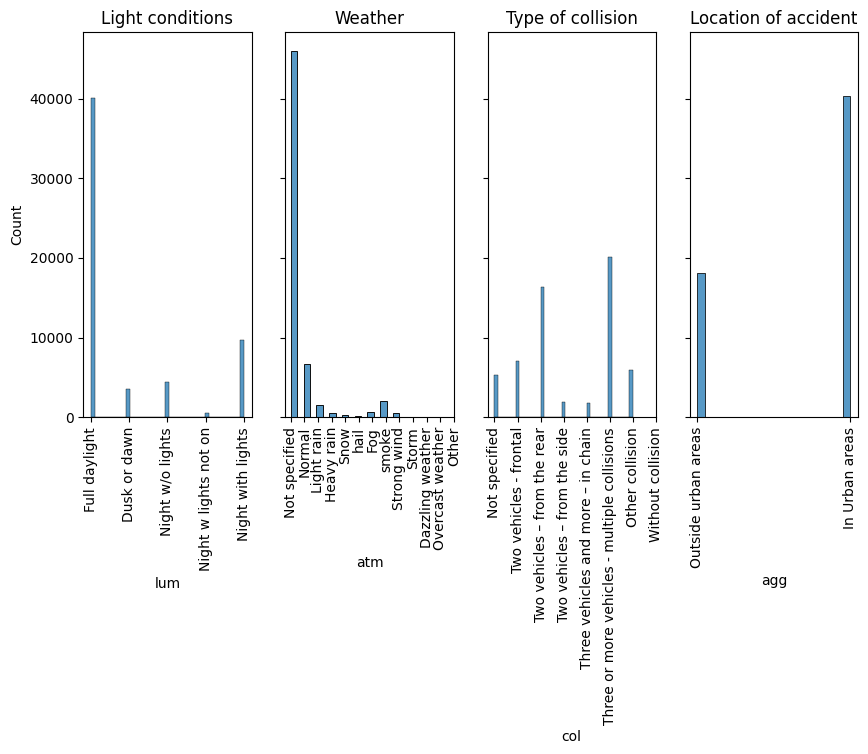

In [13]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 4, sharey=True, figsize=(10,5))
plot_hist(characteristics_df, 'lum', "Light conditions", ax=axes[0], rot=90)
plot_hist(characteristics_df, "atm", "Weather", ax=axes[1], rot=90)
plot_hist(characteristics_df, "col", "Type of collision", ax=axes[2],rot=90)
plot_hist(characteristics_df, "agg", "Location of accident", ax=axes[3], rot=90)

## The `locations` Dataframe

In [6]:
locations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58397 entries, 0 to 58396
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Num_Acc  58397 non-null  int64  
 1   catr     58397 non-null  int64  
 2   voie     53777 non-null  float64
 3   v1       213 non-null    float64
 4   v2       1707 non-null   object 
 5   circ     58333 non-null  float64
 6   nbv      58290 non-null  float64
 7   pr       26491 non-null  float64
 8   pr1      26280 non-null  float64
 9   vosp     58262 non-null  float64
 10  prof     58301 non-null  float64
 11  plan     58299 non-null  float64
 12  lartpc   56988 non-null  float64
 13  larrout  57149 non-null  float64
 14  surf     58310 non-null  float64
 15  infra    58313 non-null  float64
 16  situ     58334 non-null  float64
 17  env1     58311 non-null  float64
dtypes: float64(15), int64(2), object(1)
memory usage: 8.0+ MB


In [7]:
locations_df.describe()

,Num_Acc,catr,voie,v1,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
count,5.839700e+04,58397.000000,53777.000000,213.000000,58333.000000,58290.000000,26491.000000,26280.000000,58262.000000,58301.000000,58299.000000,56988.000000,57149.000000,58310.000000,58313.000000,58334.000000,58311.000000
mean,2.013000e+11,3.401682,174.033379,2.225352,1.820890,2.030880,25.371881,318.161758,0.133174,1.129723,1.173742,5.603197,53.005004,1.285800,0.428361,1.142061,44.958584
std,1.685791e+04,1.131279,892.826219,0.418798,0.755068,1.269879,85.079547,367.071988,0.559924,0.623468,0.721136,22.360146,56.461468,1.001552,1.329838,0.721307,49.136649
min,2.013000e+11,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.013000e+11,3.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.013000e+11,4.000000,0.000000,2.000000,2.000000,2.000000,7.000000,200.000000,0.000000,1.000000,1.000000,0.000000,57.000000,1.000000,0.000000,1.000000,3.000000
75%,2.013000e+11,4.000000,62.000000,2.000000,2.000000,2.000000,26.000000,570.000000,0.000000,1.000000,1.000000,0.000000,76.000000,1.000000,0.000000,1.000000,99.000000
max,2.013001e+11,9.000000,38300.000000,3.000000,4.000000,13.000000,7828.000000,9540.000000,3.000000,4.000000,4.000000,900.000000,970.000000,9.000000,7.000000,5.000000,99.000000


In [8]:
# How many rows with NaN value per column?
locations_df.isna().sum()

Num_Acc        0
catr           0
voie        4620
v1         58184
v2         56690
circ          64
nbv          107
pr         31906
pr1        32117
vosp         135
prof          96
plan          98
lartpc      1409
larrout     1248
surf          87
infra         84
situ          63
env1          86
dtype: int64

In [9]:
print(f"Total rows with `NaN` values = {len(locations_df) - len(locations_df.dropna())} out of {len(locations_df)}")

Total rows with `NaN` values = 58352 out of 58397


<Axes: title={'center': 'Accident loc'}, xlabel='situ', ylabel='Count'>

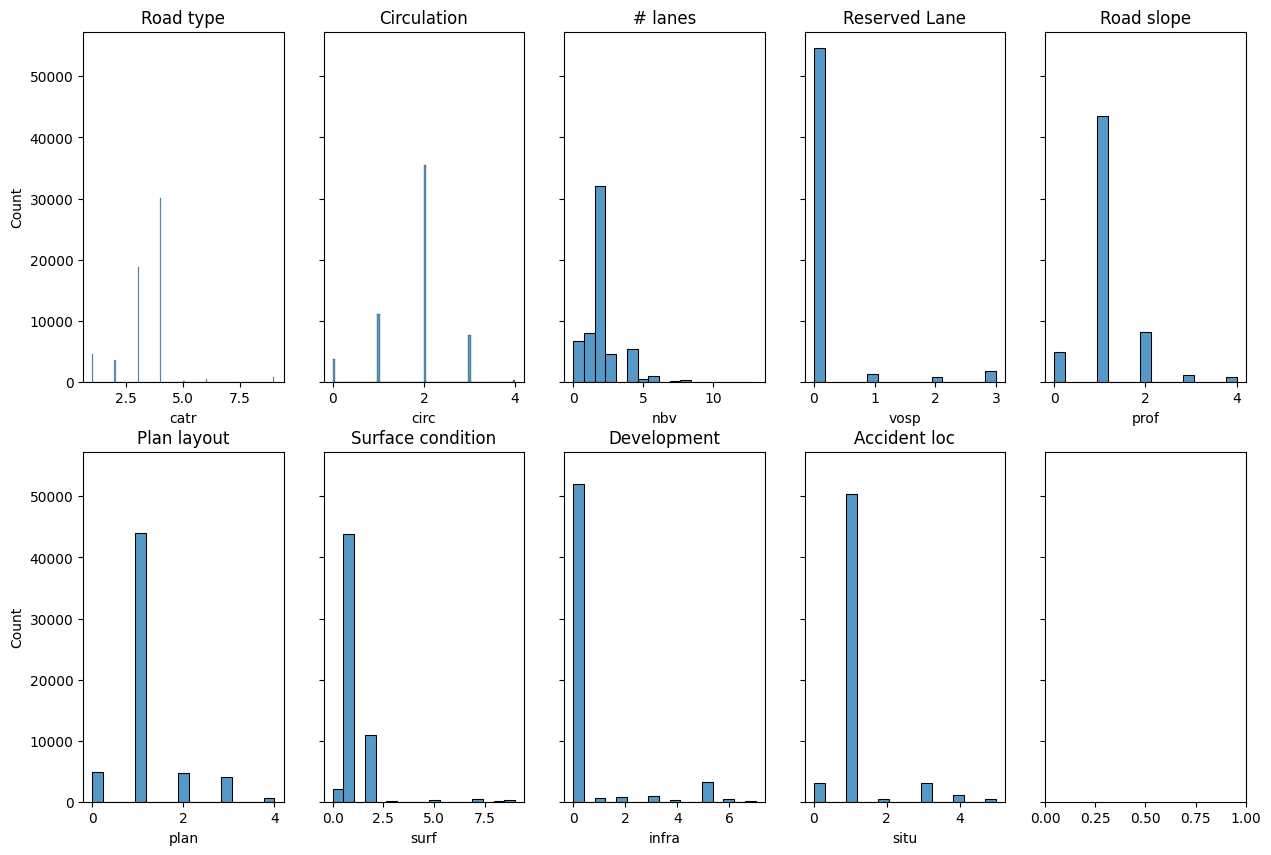

In [23]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 5, sharey=True, figsize=(15,10))
plot_hist(locations_df, 'catr', "Road type", ax=axes[0][0], rot=90)
plot_hist(locations_df, "circ", "Circulation", ax=axes[0][1], rot=90)
plot_hist(locations_df, "nbv", "# lanes", ax=axes[0][2],rot=90)
plot_hist(locations_df, "vosp", "Reserved Lane", ax=axes[0][3], rot=90)
plot_hist(locations_df, "prof", "Road slope", ax=axes[0][4], rot=90)
plot_hist(locations_df, "plan", "Plan layout", ax=axes[1][0], rot=90)
plot_hist(locations_df, "surf", "Surface condition", ax=axes[1][1], rot=90)
plot_hist(locations_df, "infra", "Development", ax=axes[1][2], rot=90)
plot_hist(locations_df, "situ", "Accident loc", ax=axes[1][3], rot=90)


## The `vehicles` Dataframe

In [24]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98925 entries, 0 to 98924
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Num_Acc  98925 non-null  int64  
 1   senc     98925 non-null  int64  
 2   catv     98925 non-null  int64  
 3   occutc   98925 non-null  int64  
 4   obs      98869 non-null  float64
 5   obsm     98860 non-null  float64
 6   choc     98898 non-null  float64
 7   manv     98886 non-null  float64
 8   num_veh  98925 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 6.8+ MB


In [25]:
vehicles_df.describe()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv
count,9.892500e+04,98925.000000,98925.000000,98925.000000,98869.000000,98860.000000,98898.000000,98886.000000
mean,2.013000e+11,0.036159,12.491079,0.084761,0.863678,1.542039,2.912384,5.885798
std,1.684421e+04,0.209062,11.795701,2.316585,2.900186,1.156479,2.473001,7.125036
min,2.013000e+11,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.013000e+11,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,2.013000e+11,0.000000,7.000000,0.000000,0.000000,2.000000,2.000000,1.000000
75%,2.013000e+11,0.000000,10.000000,0.000000,0.000000,2.000000,4.000000,13.000000
max,2.013001e+11,2.000000,99.000000,480.000000,16.000000,9.000000,9.000000,24.000000


In [26]:
# How many rows with NaN value per column?
vehicles_df.isna().sum()

Num_Acc     0
senc        0
catv        0
occutc      0
obs        56
obsm       65
choc       27
manv       39
num_veh     0
dtype: int64

In [27]:
print(f"Total rows with `NaN` values = {len(vehicles_df) - len(vehicles_df.dropna())} out of {len(vehicles_df)}")

Total rows with `NaN` values = 121 out of 98925


<Axes: title={'center': 'Manouver b4 accident'}, xlabel='manv', ylabel='Count'>

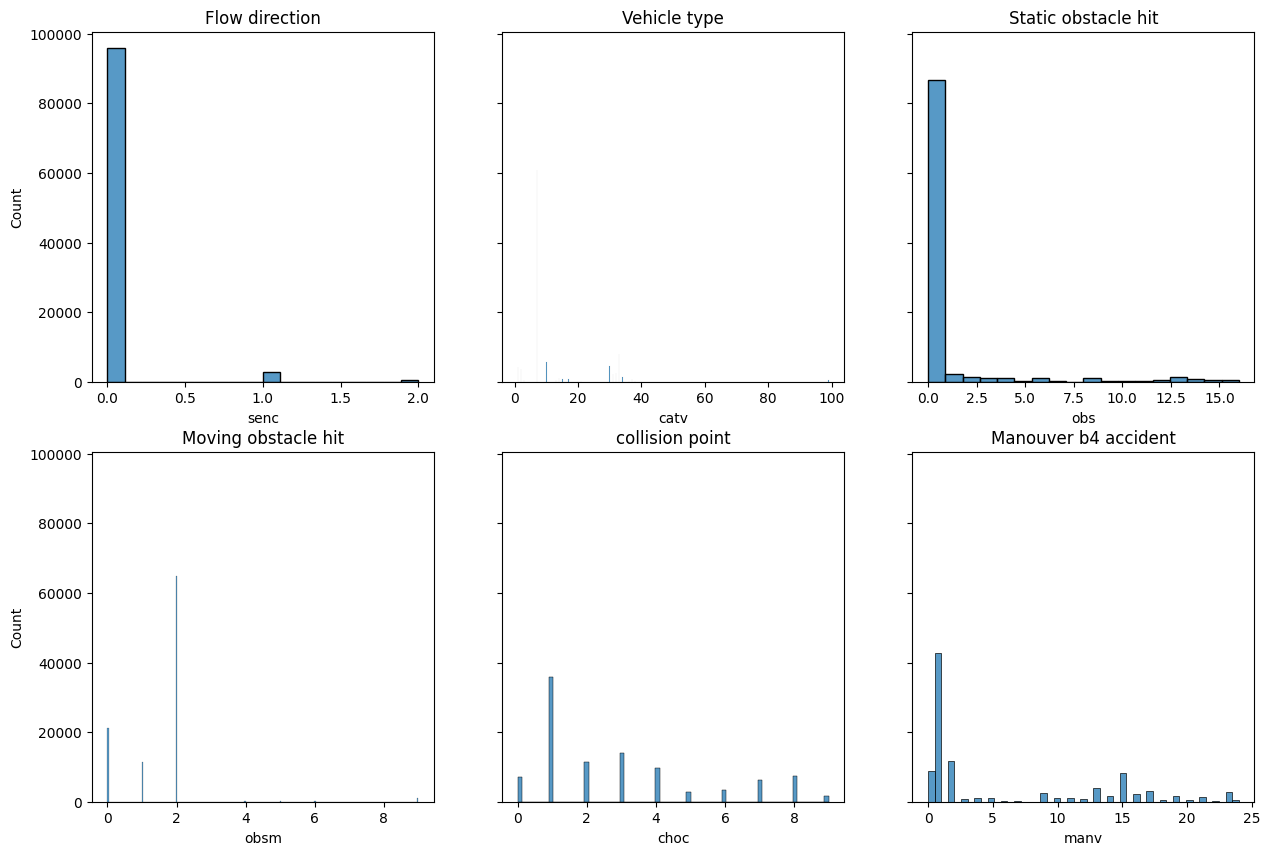

In [40]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 3, sharey=True, figsize=(15,10))
plot_hist(vehicles_df, 'senc', "Flow direction", ax=axes[0][0], rot=90)
plot_hist(vehicles_df, "catv", "Vehicle type", ax=axes[0][1], rot=90)
plot_hist(vehicles_df, "obs", "Static obstacle hit", ax=axes[0][2],rot=90)
plot_hist(vehicles_df, "obsm", "Moving obstacle hit", ax=axes[1][0], rot=90)
plot_hist(vehicles_df, "choc", "collision point", ax=axes[1][1], rot=90)
plot_hist(vehicles_df, "manv", "Manouver b4 accident", ax=axes[1][2], rot=90)


## The `users` Dataframe

In [30]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128694 entries, 0 to 128693
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  128694 non-null  int64  
 1   place    116657 non-null  float64
 2   catu     128694 non-null  int64  
 3   grav     128694 non-null  int64  
 4   sexe     128694 non-null  int64  
 5   trajet   128668 non-null  float64
 6   secu     124695 non-null  float64
 7   locp     128584 non-null  float64
 8   actp     128556 non-null  float64
 9   etatp    128534 non-null  float64
 10  an_nais  128652 non-null  float64
 11  num_veh  128694 non-null  object 
dtypes: float64(7), int64(4), object(1)
memory usage: 11.8+ MB


In [31]:
users_df.describe()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais
count,1.286940e+05,116657.000000,128694.000000,128694.000000,128694.000000,128668.000000,124695.000000,128584.000000,128556.000000,128534.000000,128652.000000
mean,2.013000e+11,1.313972,1.347196,2.511081,1.337273,3.018241,21.854533,0.246664,0.306536,0.112741,1974.706137
std,1.685167e+04,0.874777,0.649915,1.333666,0.472781,2.597020,24.249651,0.905150,1.104840,0.396189,18.337595
min,2.013000e+11,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1909.000000
25%,2.013000e+11,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1963.000000
50%,2.013000e+11,1.000000,1.000000,3.000000,1.000000,4.000000,11.000000,0.000000,0.000000,0.000000,1978.000000
75%,2.013000e+11,1.000000,2.000000,4.000000,2.000000,5.000000,21.000000,0.000000,0.000000,0.000000,1989.000000
max,2.013001e+11,9.000000,4.000000,4.000000,2.000000,9.000000,93.000000,8.000000,9.000000,3.000000,2013.000000


In [32]:
# How many rows with NaN value per column?
users_df.isna().sum()

Num_Acc        0
place      12037
catu           0
grav           0
sexe           0
trajet        26
secu        3999
locp         110
actp         138
etatp        160
an_nais       42
num_veh        0
dtype: int64

In [33]:
print(f"Total rows with `NaN` values = {len(users_df) - len(users_df.dropna())} out of {len(users_df)}")

Total rows with `NaN` values = 12348 out of 128694


<Axes: title={'center': 'Severity'}, xlabel='grav', ylabel='Count'>

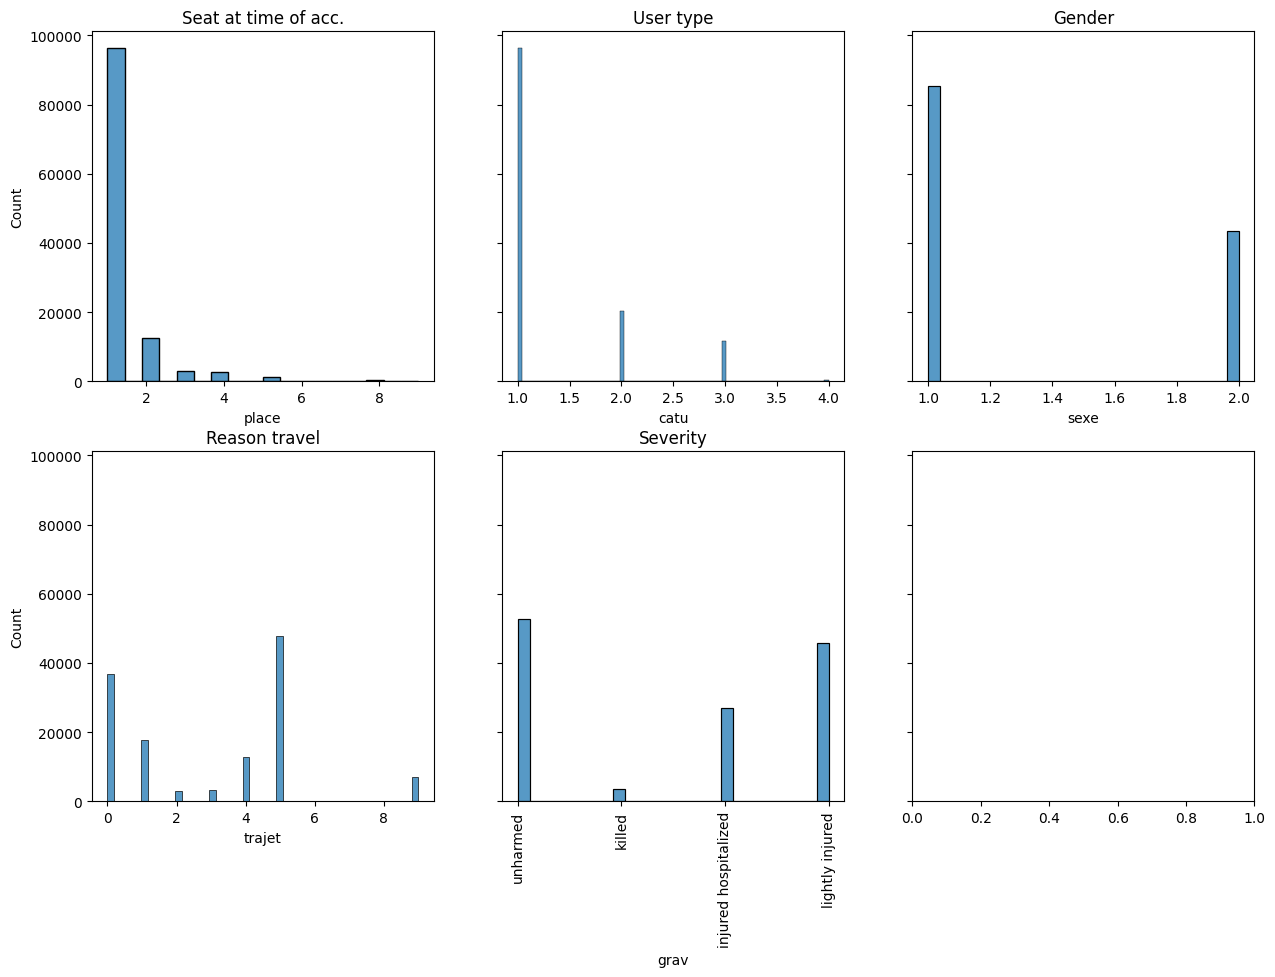

In [41]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 3, sharey=True, figsize=(15,10))
plot_hist(users_df, 'place', "Seat at time of acc.", ax=axes[0][0], rot=90)
plot_hist(users_df, "catu", "User type", ax=axes[0][1], rot=90)
plot_hist(users_df, "sexe", "Gender", ax=axes[0][2], rot=90)
plot_hist(users_df, "trajet", "Reason travel", ax=axes[1][0], rot=90)
plot_hist(users_df, "grav", "Severity", ax=axes[1][1],rot=90)


# Combine all dataframe for tha single year

In [42]:
df = load_and_merge_data_for(DATA_DIR, year=YEAR)
df.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh_y
0,201300000001,13,2,19,1715,1,2,1,1.0,3,...,1,1,1,1.0,11.0,0.0,0.0,0.0,1961.0,A01
1,201300000001,13,2,19,1715,1,2,1,1.0,3,...,1,3,1,1.0,21.0,0.0,0.0,0.0,1987.0,B02
2,201300000001,13,2,19,1715,1,2,1,1.0,3,...,1,1,1,1.0,11.0,0.0,0.0,0.0,1961.0,A01
3,201300000001,13,2,19,1715,1,2,1,1.0,3,...,1,3,1,1.0,21.0,0.0,0.0,0.0,1987.0,B02
4,201300000002,13,3,22,1815,1,1,1,1.0,6,...,1,3,1,5.0,21.0,0.0,0.0,0.0,1963.0,A01


## Plot relationships of categorical data

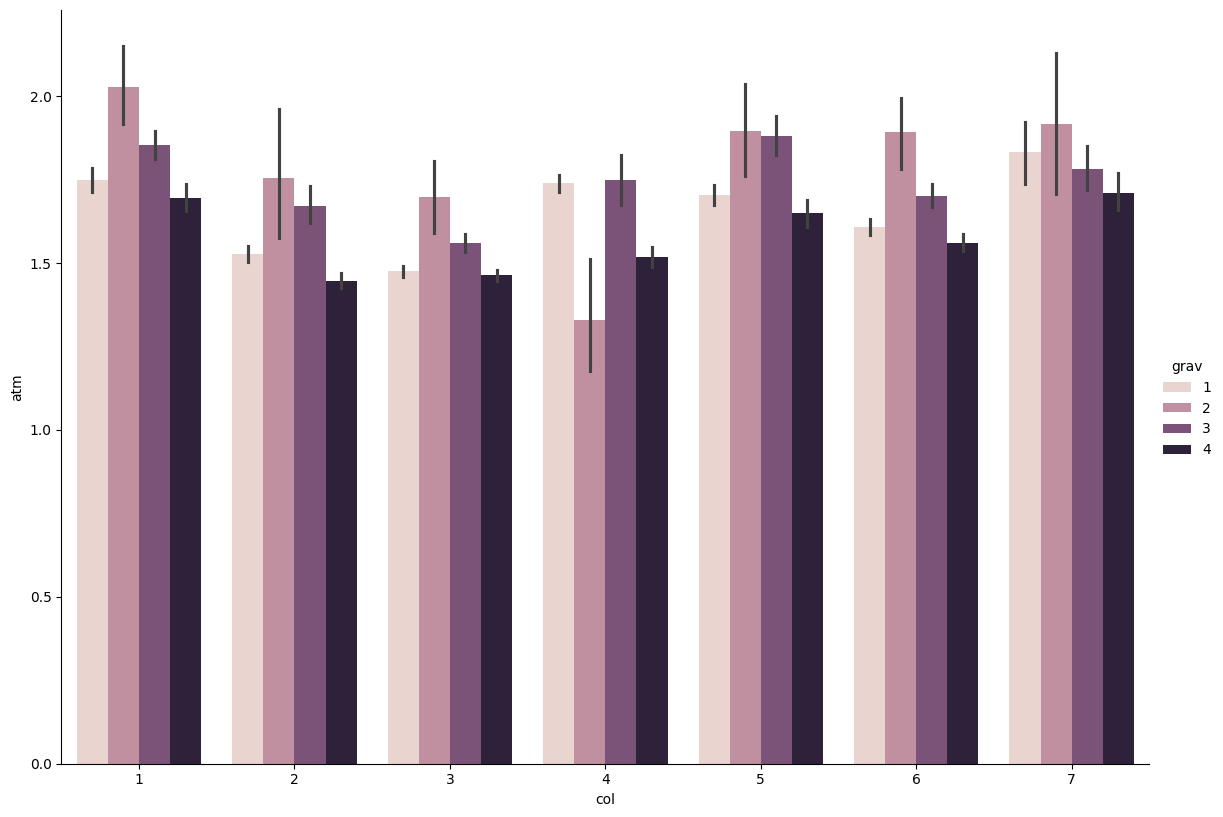

In [61]:
ax = sns.catplot(  data=df, x="col", y="atm", kind="bar", hue="grav", height=8.27, aspect=11.7/8.27)